# **Колесников Алексей, БМТ1-12М**
Вариант: БМТ1-12М	05 М	45

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest, normaltest, norm

In [81]:
data = pd.read_csv('rlms_hse.csv')

In [83]:
data.head()

,idind,uredid.i,uid.i,uid.h,tid.i,tid.h,sid.i,sid.h,rid.i,rid.h,...,um101,um102,um103,um104,um105,um106,um107,um108,um109,um111
0,3,146901,1001201,10012,1001201.0,10012.0,1001201.0,10012.0,1001201.0,10012.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,147101,1000301,10003,1000301.0,10003.0,1000301.0,10003.0,1000301.0,10003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,146801,1000401,10004,1000401.0,10004.0,1000401.0,10004.0,1000401.0,10004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36,145501,1002401,10024,1002401.0,10024.0,1002401.0,10024.0,1002401.0,10024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,37,145502,1002402,10024,1002402.0,10024.0,1002402.0,10024.0,1002402.0,10024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
selected_data = data[['u.age', 'uh5', 'um1', 'um2', 'region']]
del data

In [85]:
data_man = selected_data[(selected_data['u.age'] >= 18) & (selected_data['uh5'] == 1) & (selected_data['region'] == 45)]
data_man = data_man.rename(columns={'u.age': 'age', 'uh5': 'sex', 'um1': 'weight', 'um2': 'height'})
data_man.head()

,age,sex,weight,height,region
296,62.0,1,56.0,156.0,45
301,28.0,1,70.0,182.0,45
304,52.0,1,83.0,180.0,45
305,50.0,1,73.0,168.0,45
308,60.0,1,78.0,172.0,45


In [86]:
data_man.shape[0]

100

Фильтрация

In [87]:
data_man.loc[:, 'weight'] = data_man['weight'].replace([99999997, 99999998, 99999999, 100000000], np.nan)
data_man.loc[:, 'height'] = data_man['height'].replace([99999997, 99999998, 99999999, 100000000], np.nan)

mean_um1 = data_man['weight'].mean()
mean_um2 = data_man['height'].mean()

data_man.loc[:, 'weight'].fillna(mean_um1, inplace=True)
data_man.loc[:, 'height'].fillna(mean_um2, inplace=True)

data_man.dropna()

<ipython-input-87-30801c981464>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_man.loc[:, 'weight'].fillna(mean_um1, inplace=True)
<ipython-input-87-30801c981464>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

,age,sex,weight,height,region
296,62.0,1,56.0,156.0,45
301,28.0,1,70.0,182.0,45
304,52.0,1,83.0,180.0,45
305,50.0,1,73.0,168.0,45
308,60.0,1,78.0,172.0,45
...,...,...,...,...,...
11782,23.0,1,71.0,174.0,45
11784,24.0,1,70.0,185.0,45
11786,32.0,1,71.0,165.0,45
11788,30.0,1,95.0,170.0,45


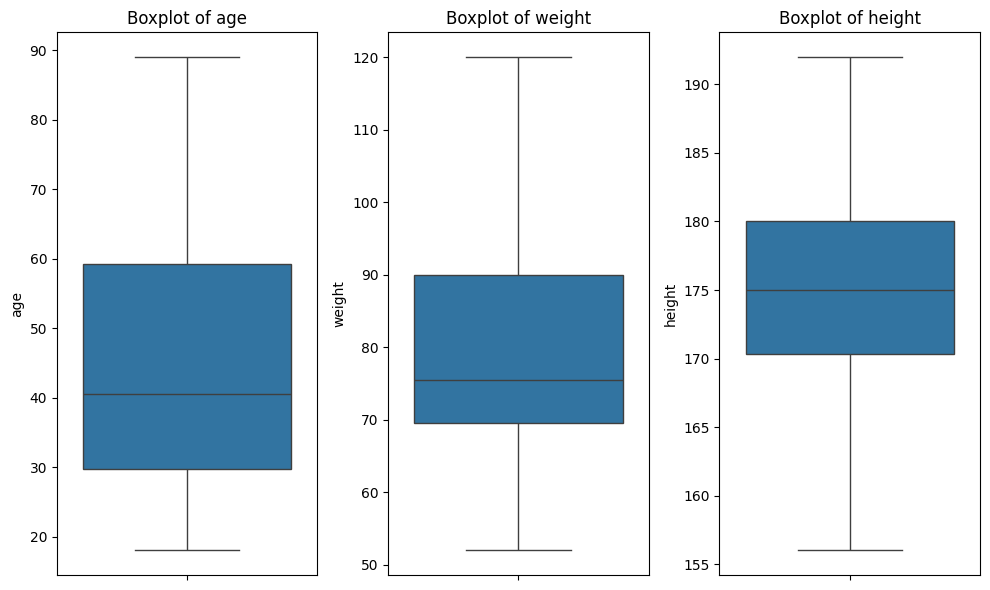

In [88]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=data_man['age'])
plt.title('Boxplot of age')

plt.subplot(1, 3, 2)
sns.boxplot(y=data_man['weight'])
plt.title('Boxplot of weight')

plt.subplot(1, 3, 3)
sns.boxplot(y=data_man['height'])
plt.title('Boxplot of height')

plt.tight_layout()
plt.show()

In [89]:
def sturges(data):
    return int(np.ceil(np.log2(len(data)) + 1))

def scott(data):
    return int(3.5 * np.std(data) / (len(data)**(1/3)))

def freedman_diaconis(data):
    q75, q25 = np.percentile(data, [75 ,25])
    iqr = q75 - q25
    range_data = np.max(data) - np.min(data)
    return int(np.ceil(range_data / (2 * iqr / (len(data)**(1/3)))))

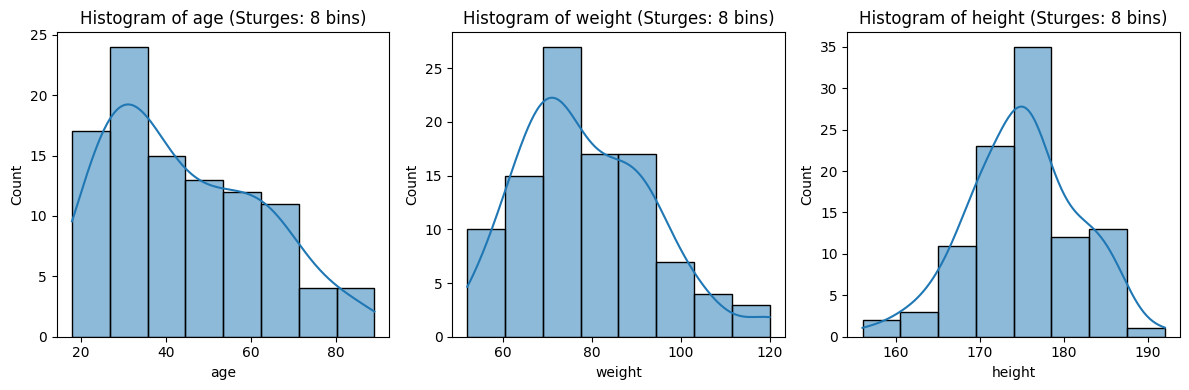

In [91]:
plt.figure(figsize=(12, 4))

for i, column in enumerate(['age', 'weight', 'height'], 1):
    plt.subplot(1, 3, i)
    bins_sturges = sturges(data_man[column])
    sns.histplot(data_man[column], bins=bins_sturges, kde=True)
    plt.title(f'Histogram of {column} (Sturges: {bins_sturges} bins)')

plt.tight_layout()
plt.show()

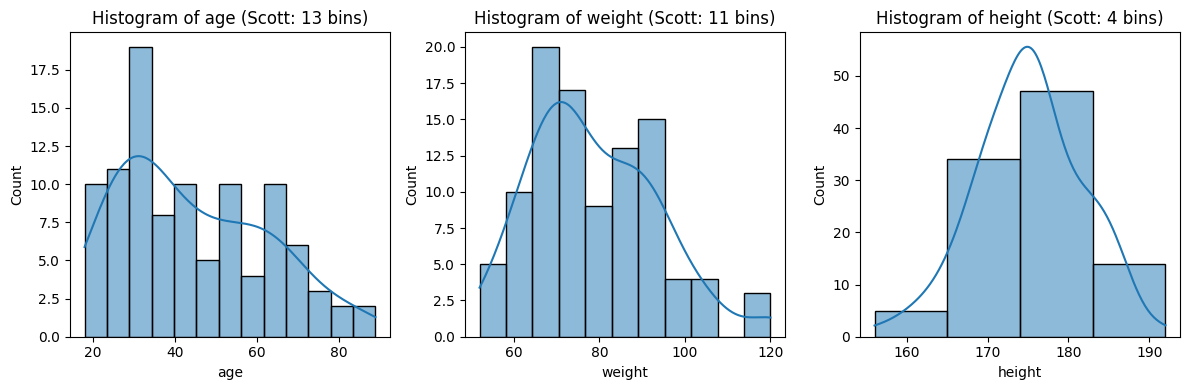

In [92]:
plt.figure(figsize=(12, 4))

for i, column in enumerate(['age', 'weight', 'height'], 1):
    plt.subplot(1, 3, i)
    bins_scott = scott(data_man[column])
    sns.histplot(data_man[column], bins=bins_scott, kde=True)
    plt.title(f'Histogram of {column} (Scott: {bins_scott} bins)')

plt.tight_layout()
plt.show()

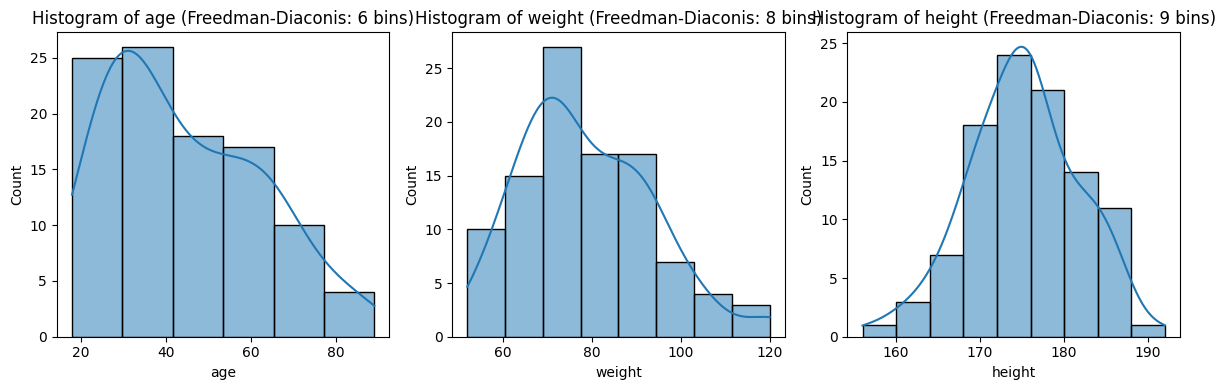

In [93]:
plt.figure(figsize=(12, 4))

for i, column in enumerate(['age', 'weight', 'height'], 1):
    plt.subplot(1, 3, i)
    bins_freedman_diaconis = freedman_diaconis(data_man[column])
    sns.histplot(data_man[column], bins=bins_freedman_diaconis, kde=True)
    plt.title(f'Histogram of {column} (Freedman-Diaconis: {bins_freedman_diaconis} bins)')

plt.tight_layout()
plt.show()

# **2.	Получить основные характеристики выборки (минимальное значение, среднее значение, максимальное значение, медиану, стандартное отклонение).**

In [94]:
data_man.describe()

,age,sex,weight,height,region
count,100.000000,100.0,100.000000,100.000000,100.0
mean,44.340000,1.0,78.878788,175.050505,45.0
std,18.145996,0.0,14.881364,6.600771,0.0
min,18.000000,1.0,52.000000,156.000000,45.0
25%,29.750000,1.0,69.500000,170.300000,45.0
50%,40.500000,1.0,75.500000,175.000000,45.0
75%,59.250000,1.0,90.000000,180.000000,45.0
max,89.000000,1.0,120.000000,192.000000,45.0


# **3.	Выполнить проверку гипотезы о нормальности распределения. Для проверки использовать не менее 3 критериев (например, Пирсона, Шапиро-Уилка, Крамера фон Мизеса). Каждую из гипотез проверить для полного набора данных и для набора данных в 100 и 300 значений (если в полученной общей выборке число значений меньше 300, ограничиться двумя проверками, если меньше 100 – одной).**

In [95]:
def norm_shapiro(sample):
    stat, p = shapiro(sample)
    print(f'p-значение: {p}')
    alpha = 0.05

    if p > alpha:
        print('Распределение нормальное (статистически не значимое различие)')
    else:
        print('Распределение не нормальное (статистически значимое различие)')
    return stat, p

In [105]:
for column in ['age', 'weight', 'height']:
    print(f'Проверка на нормальность для столбца {column} тестом Шапиро')
    norm_shapiro(data_man[column])

Проверка на нормальность для столбца age тестом Шапиро
p-значение: 0.0004891090095648569
Распределение не нормальное (статистически значимое различие)
Проверка на нормальность для столбца weight тестом Шапиро
p-значение: 0.00745648538840148
Распределение не нормальное (статистически значимое различие)
Проверка на нормальность для столбца height тестом Шапиро
p-значение: 0.5377345205073748
Распределение нормальное (статистически не значимое различие)


In [106]:
def check_normality(sample):
    stat, p = kstest(sample, 'norm', args=(np.mean(sample), np.std(sample)))
    print(f'p-значение: {p}')
    alpha = 0.05

    if p > alpha:
        print('Распределение нормальное (статистически не значимое различие)')
    else:
        print('Распределение не нормальное (статистически значимое различие)')
    return stat, p

In [110]:
for column in ['age', 'weight', 'height']:
    print(f'Проверка на нормальность для столбца {column} тестом Колмогорова-Смирнова')
    check_normality(data_man[column])

Проверка на нормальность для столбца age тестом Колмогорова-Смирнова
p-значение: 0.12183480703462911
Распределение нормальное (статистически не значимое различие)
Проверка на нормальность для столбца weight тестом Колмогорова-Смирнова
p-значение: 0.21118927518225178
Распределение нормальное (статистически не значимое различие)
Проверка на нормальность для столбца height тестом Колмогорова-Смирнова
p-значение: 0.33790905056305726
Распределение нормальное (статистически не значимое различие)


In [111]:
def pearson(sample):
    stat, p = normaltest(sample)
    print(f'p-значение: {p}')
    alpha = 0.05

    if p > alpha:
        print('Распределение нормальное (статистически не значПимое различие)')
    else:
        print('Распределение не нормальное (статистически значимое различие)')
    return stat, p

In [112]:
for column in ['age', 'weight', 'height']:
    print(f'Проверка на нормальность для столбца {column} тестом Пирсона')
    pearson(data_man[column].dropna())

Проверка на нормальность для столбца age тестом Пирсона
p-значение: 0.016273493477460002
Распределение не нормальное (статистически значимое различие)
Проверка на нормальность для столбца weight тестом Пирсона
p-значение: 0.04037587052661631
Распределение не нормальное (статистически значимое различие)
Проверка на нормальность для столбца height тестом Пирсона
p-значение: 0.7774649113080292
Распределение нормальное (статистически не значПимое различие)


# **Выводы**

1. Столбец age: Результаты тестов Шапиро и Пирсона указывают на то, что распределение не является нормальным. Однако тест Колмогорова-Смирнова показывает, что распределение нормальное. Возможно, это связано с различиями в чувствительности тестов. Тест Шапиро более чувствителен к отклонениям в центральной части распределения, в то время как тест Колмогорова-Смирнова более чувствителен к отклонениям в хвостах распределения. Тест Пирсона, основанный на частотах, может быть менее чувствителен к небольшим отклонениям.

2. Столбец weight: Результаты тестов Шапиро и Пирсона также указывают на то, что распределение не является нормальным. Тест Колмогорова-Смирнова, однако, показывает нормальное распределение. Это может быть связано с тем, что тест Колмогорова-Смирнова менее чувствителен к отклонениям в центральной части распределения, чем тест Шапиро.

3. Столбец height: Все три теста (Шапиро, Колмогорова-Смирнова и Пирсона) указывают на то, что распределение является нормальным. Это подтверждает, что данные в этом столбце действительно соответствуют нормальному распределению.